# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [2]:
!curl -O https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
!curl -O https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip
! mkdir data
#! mkdir data/lfw
#! mkdir data/dog_images
! unzip dogImages.zip -d data/

! unzip lfw.zip -d data/
#! rm -rf data/*
#! rm *.zip*
#!ls /dat/dog*

--2019-09-28 10:17:56--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.24.169
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.24.169|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip’

dogImages.zip       100%[===================>]   1.05G  20.6MB/s    in 53s     

2019-09-28 10:18:49 (20.6 MB/s) - ‘dogImages.zip’ saved [1132023110/1132023110]

--2019-09-28 10:18:50--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.120.96
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.120.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 196739509 (188M) [application/zip]
Saving to: ‘lfw.zip’

lfw.zip             100%[==================

In [1]:
!ls 

sample_data


In [3]:
import numpy as np
from glob import glob


# load filenames for human and dog images
human_files = np.array(glob("data/lfw/*/*"))
dog_files = np.array(glob("data/dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


In [4]:
!ls haarcascades

ls: cannot access 'haarcascades': No such file or directory


In [5]:
#! rm -rf haarcascades
! curl -O https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt.xml haarcascades/haarcascade_frontalface_alt.xml
! mkdir haarcascades
! cp haarcascade_frontalface_alt.xml haarcascades/haarcascade_frontalface_alt.xml

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  660k  100  660k    0     0  1458k      0 --:--:-- --:--:-- --:--:-- 1458k
curl: (6) Could not resolve host: haarcascades


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


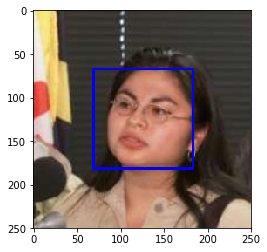

In [6]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [0]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
 96% and 11% 

In [8]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#
hig = 0
for a in range(len(human_files_short[:])):

    if face_detector(human_files_short[a]) == True:
        hig +=1
        
    
        
print(f'Percentage of human faces detected in human image sample set is  {hig}% because the number detected out of 100 is {hig}')
dig = 0        
for a in range(len(dog_files_short[:])):
    
    if face_detector(dog_files_short[a]) == True:
        dig +=1
        
print(f'Percentage of human faces detected in dogs image sample set is {dig}% because the number detected out of 100 is {dig}')


Percentage of human faces detected in human image sample set is  96% because the number detected out of 100 is 96
Percentage of human faces detected in dogs image sample set is 11% because the number detected out of 100 is 11


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [9]:
#b =face_detector(human_files_short[3]) 
#b
#hig
from PIL import Image

testsize =Image.open(dog_files_short[1])
testsize.size

(309, 269)

In [0]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [10]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()
    
   

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:04<00:00, 113118474.52it/s]


In [0]:
#VGG16 = VGG16.to('cuda')

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [0]:
from PIL import Image
import torchvision.transforms as transforms
import torchvision.models as models
import torch



#vgg16 = models.vgg16(pretrained=True)

transform = transforms.Compose([            
 transforms.Resize(256),                    
 transforms.CenterCrop(224),               
 transforms.ToTensor(),                     
 transforms.Normalize(                      
 mean=[0.485, 0.456, 0.406],                
 std=[0.229, 0.224, 0.225]                 
 )])

# get the image's width and height in pixels
#img.size
#img = Image.open(img_path)
#img_t = transform(img)



def VGG16_predict(img_path):
    img = Image.open(img_path)
    img_t = transform(img)
    if use_cuda:
        img_t = img_t.to('cuda')
    
    batch_t = torch.unsqueeze(img_t, 0)
    
    
    #Use pre-trained VGG-16 model to obtain index corresponding to 
    #predicted ImageNet class for image at specified path
    
   # Args:
    #    img_path: path to an image
        
    #Returns:
     #   Index corresponding to VGG-16 model's prediction
        
   
    VGG16.eval()
    #img = Image.open(img_path)
    #out = vgg16(img)
    out = VGG16(batch_t)
    _, index = torch.max(out, 1)
    outi = index[0].tolist() 
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    return outi # None # predicted class index''''

#test =VGG16_predict(dog_files[180])


In [11]:
! curl -O https://gist.githubusercontent.com/yrevar/942d3a0ac09ec9e5eb3a/raw/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 30564  100 30564    0     0  74546      0 --:--:-- --:--:-- --:--:-- 74364


In [0]:
with open('imagenet1000_clsidx_to_labels.txt') as f:
  classes = [line.strip() for line in f.readlines()]


In [0]:
#classes.dtype
#ref https://arxiv.org/pdf/1810.00736.pdf Since most were trained on the same image dataset i have to compare model accuracy and performance ResNeXt-101-32x8d  (best accuracy vs perf) and likely inception resnet 2 or resnet 154

In [0]:
#test1 =VGG16_predict(dog_files[1])
#_, index = torch.max(test1, 1)
#outi = index[0].tolist() 
#percentage = torch.nn.functional.softmax(test1, dim=1)[0] * 100
 
#print(classes[index[0]], percentage[index[0]].item())

In [0]:
#index[0].tolist()
#classes[index[0]]

In [0]:
#batch_t = torch.unsqueeze(img_t, 0)
#imga = Image.open('data/dogImages/train/095.Kuvasz/Kuvasz_06384.jpg')
#img_t = transform(imga)
#batch_t = torch.unsqueeze(img_t, 0)
#img_t
#batch_t

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [0]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    #verbose
    #out = VGG16_predict(img_path)
    #ind = out.index
    #if (ind >= 151 and ind <= 268):
    #    return 'True'
    #else:
    #    return 'False'
    #Compact
    if ((VGG16_predict(img_path) > 150) and (VGG16_predict(img_path)) < 269):
        return True
    else:
        return False
#verbos    

    
    #return None # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

**__Answer**:__  1% and 100% (also see print out)


In [16]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
dog_detector(human_files_short[0])

higp = 0
for a in range(len(human_files_short[:])):

    if dog_detector(human_files_short[a]) == True:
        higp +=1
        
    
        
print(f'Percentage of dog faces detected in human image sample set is {higp}% because the number detected out of 100 is  {higp}')
digp = 0        
for a in range(len(dog_files_short[:])):
    
    if dog_detector(dog_files_short[a]) == True:
        digp +=1
        
print(f'Percentage of dog faces detected in dogs image sample set is {digp}% because the number detected out of 100 is  {digp}')
 


Percentage of dog faces detected in human image sample set is 1% because the number detected out of 100 is  1
Percentage of dog faces detected in dogs image sample set is 100% because the number detected out of 100 is  100


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [0]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [0]:
import os
from torchvision import datasets
# load filenames for human and dog images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

batch_size = 20
num_workers = 4

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes data/dogImages/train/

data_directory = "data/dogImages/"
train_directory = os.path.join(data_directory, 'train/')
valid_directory = os.path.join(data_directory, 'valid/')
test_directory = os.path.join(data_directory, 'test/')

standard_normalization = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                              std=[0.229, 0.224, 0.225])
'''transforms.Resize(256),                    #[2]
 transforms.CenterCrop(224),                #[3]
 transforms.ToTensor(),                     #[4]
 transforms.Normalize(                      #[5]
 mean=[0.485, 0.456, 0.406],                #[6]
 std=[0.229, 0.224, 0.225] '''
data_transforms = {'train': transforms.Compose([transforms.RandomResizedCrop(224),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.ToTensor(),
                                     standard_normalization]),
                   'valid': transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(224),
                                         transforms.ToTensor(),
                                     standard_normalization]),
                   'test': transforms.Compose([transforms.Resize(size=(224,224)),
                                     transforms.ToTensor(), 
                                     standard_normalization])
                  }
train_data = datasets.ImageFolder(train_directory, transform=data_transforms['train'])
valid_data = datasets.ImageFolder(valid_directory, transform=data_transforms['valid'])
test_data = datasets.ImageFolder(test_directory, transform=data_transforms['test'])

trainloader = torch.utils.data.DataLoader(train_data,
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=True)
#trainloader = torch.unsqueeze(trainload, 0)
validloader = torch.utils.data.DataLoader(valid_data,
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=False)
testloader = torch.utils.data.DataLoader(test_data,
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=False)
loaders_scratch = {
    'train': trainloader,
    'valid': validloader,
    'test': testloader
}


#torchvision.datasets
#dog_train = np.array(glob("dog_images/train"))
#dogpil = Image.open
#def loaders(a):     path = "/data/dog_images/"+a     b = datasets.ImageFolder(path, transform=transform)
    #return torch.utils.data.DataLoader(b, batch_size=4,shuffle=True, num_workers=2) 
#dog_files_valid = datasets.ImageFolder("/data/dog_images/valid", transform=transform)
#dog_files_test = datasets.ImageFolder("/data/dog_images/test", transform=transform)




#img = 
#img_t = transform(Image.open(dog_files_train)) #using same transform used earlier

#trainloader = torch.utils.data.DataLoader(dog_files_train, batch_size=4,shuffle=True, num_workers=2)    
#validloader = torch.utils.data.DataLoader(dog_files_valid, batch_size=4,shuffle=True, num_workers=2) 
#testloader = torch.utils.data.DataLoader(dog_files_test, batch_size=4,shuffle=True, num_workers=2) 

#class_names = [item[4:].replace("_", " ") for item in loaders_transfer['train'].dataset.classes]
#model_transfer.load_state_dict(torch.load('model_transfer.pt'))
#loaders_transfer['train'].dataset.classes[:10]
#class_names[:10]


In [0]:
#dog_files_test
#trainload
  

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
Input is coloured RGB and since dog breed is affected by colour I decided to retain the colour. I resized to 224 pixels (central) so that all pictures will end up being in the same size and centered. Also I chose the size because the pretrained models on pytorch site expects specific format. I then did a random horizontal flip (this was my data augmentation). The pictures I saw were upright and only did horizontal flip. I chose my tensor and normalization to fit pytorch models requirements because I will use both their model and mine and since theirs is not adjustable


### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [0]:
import torch.nn as nn
import torch.nn.functional as F
import time


    
# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        #self.conv1 = nn.Conv2d(3, 6, 3) 
        self.pool1 = nn.MaxPool2d(4, 4) 
        self.pool2 = nn.MaxPool2d(2, 2)
        #self.conv2 = nn.Conv2d(6, 36, 3, stride=2) 
        self.conv1 = nn.Conv2d(3, 28, 3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(28, 64, 3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        
        #self.conv3 = nn.Conv2d(36, 128, 5, stride=2) # 120
        #self.bcNorm1 = nn.BatchNorm2d(128) 
        self.fc1 = nn.Linear(7*7*128, 266)
        self.fc2 = nn.Linear(266, 133)
        self.dropout = nn.Dropout(0.2)
        
        #self.fc1 = nn.Linear(90 * 32 * 32, 1064) #what is pixel left
        #self.fc2 = nn.Linear(1064, 266)
        #self.fc3 = nn.Linear(266, 133)
        ## Define layers of a CNN
    
    def forward(self, x):
        ## Define forward behavior
        x = self.pool2(F.relu(self.conv1(x)))#250-3 +0/1 +1 = 248 #kernel = 2, stride = 2, padding =0 =>248 -2 +0/2 + 1 = 123+1 =124
        x = self.pool2(F.relu(self.conv2(x)))#124 - 5 + 0/1 = 119+1 = 120, maxpool = 60pixel
        x = self.pool2(F.relu(self.conv3(x)))#60 -5+0/1 55 +1 = 56 -->maxp-> 28px
        #print(x.shape)
        
        #x = self.bcNorm1(x)
        x = x.view(-1, 7*7*128)#26*26*128
        #x = x.view(-1, 90 * 32 * 32)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        #x = F.relu(self.fc2(x))
        x = self.fc2(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ First I determined the number of classes (from the number of folders) and set that to be the last fully connected layer. I then started with  a CCM and then a CCCM after. In essence, I felt that anything over 3 convolution layers will be overkill but felt I needed at least 3 layers because the differences between the dogs was so little. My small conv filter (3 x 3) with padding was eventually used to detect the lower level features though I initially used went without padding and short stride). I hade to increase the strides because the memory was limited and I had too many parameters. My compromise was to increase the stride and test different max pooling parameters. Even after that it did not work as well as I'd hoped as I had different problems with pixel size  and tensor output. Eventualy, I calculated my pixel size properly and had to accept the limitations of my pc memory. I also had to put a dropout values which I tweaked with trial and error.
Then I had to tune my learning rate. After trying a learning rate with different parameners, I tried the stepwise learning rate. Eventually it was a cyclic learning rate that saved the day.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [0]:
import torch.optim as optim
from torch.optim import lr_scheduler
import time
import math
import torch.nn as nn
import torch.nn.functional as F

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()# None

def cyclical_lr(stepsize, min_lr, max_lr):

    # Scaler: we can adapt this if we do not want the triangular CLR
    scaler = lambda x: 1.

    # Lambda function to calculate the LR
    lr_lambda = lambda it: min_lr + (max_lr - min_lr) * relative(it, stepsize)

    # Additional function to see where on the cycle we are
    def relative(it, stepsize):
        cycle = math.floor(1 + it / (2 * stepsize))
        x = abs(it / stepsize - 2 * cycle + 1)
        return max(0, (1 - x)) * scaler(cycle)

    return lr_lambda

#ref: https://towardsdatascience.com/adaptive-and-cyclical-learning-rates-using-pytorch-2bf904d18dee
#max_lr
#min_lr
end_lr = 0.01
factor = 10
criterion = nn.CrossEntropyLoss()
    
optimizer = torch.optim.SGD(model_scratch.parameters(), lr=1)
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=1, momentum=0.9)# None
step_size = 4*len(loaders_scratch)
clr = cyclical_lr(step_size, min_lr=end_lr/factor, max_lr=end_lr)
clr_scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer_scratch, [clr])


### TODO: select optimizer

#optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.03)# None
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_scratch, step_size=7, gamma=0.1)



In [47]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path, scheduler):
  
    """returns trained model"""
    since = time.time()
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train'], 0):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            optimizer.zero_grad()
            output = model(data)
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            loss = criterion(output, target)
            loss.backward()
            scheduler.step()
            
            optimizer.step()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            output = model(data)
            _, index = torch.max(output, 1)
            loss = criterion(output, target)
            #(output, target_tensor[i].unsqueeze(0))
            ## update the average validation loss
          
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        time_elapsed = time.time() - since
        print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
        ## TODO: save the model if validation loss has decreased
        if (valid_loss_min < valid_loss):
          #torch.save(model, 'model_scratch.pt')
          torch.save(model.state_dict(), save_path)  
          #torch.save(model.state_dict(), save_path)  
          #torch.save({'state_dict': model.state_dict()}, save_path)
          #        if (valid_loss_min < valid_loss):
          
          #torch.save(model_transfer, '.\data\model_scratch_back.pt')
        
    # return trained model
    return model



# train the model
model_scratch = train(70, loaders_scratch, model_scratch, optimizer_scratch, criterion_scratch, use_cuda, './models/modelscratch.pt', clr_scheduler)

Epoch: 1 	Training Loss: 4.484509 	Validation Loss: 4.321399
Training complete in 1m 13s
Epoch: 2 	Training Loss: 4.403836 	Validation Loss: 4.358591
Training complete in 2m 25s
Epoch: 3 	Training Loss: 4.347793 	Validation Loss: 4.136835
Training complete in 3m 37s
Epoch: 4 	Training Loss: 4.287959 	Validation Loss: 4.111568
Training complete in 4m 50s
Epoch: 5 	Training Loss: 4.237027 	Validation Loss: 4.027084
Training complete in 6m 2s
Epoch: 6 	Training Loss: 4.165581 	Validation Loss: 4.004656
Training complete in 7m 15s
Epoch: 7 	Training Loss: 4.132699 	Validation Loss: 3.916784
Training complete in 8m 28s
Epoch: 8 	Training Loss: 4.084383 	Validation Loss: 3.923734
Training complete in 9m 40s
Epoch: 9 	Training Loss: 4.004257 	Validation Loss: 3.809196
Training complete in 10m 52s
Epoch: 10 	Training Loss: 3.970146 	Validation Loss: 3.768242
Training complete in 12m 4s
Epoch: 11 	Training Loss: 3.946862 	Validation Loss: 3.723712
Training complete in 13m 17s
Epoch: 12 	Trainin

In [0]:
#torch.save(model_scratch, 'model_scratch1.pt')

torch.save(model_scratch.state_dict(), './models/modelscratch.pt')  #'./models/modelscratch.pt'

In [53]:
!ls models/

modelsave.pt  modelscratch.pt


In [54]:
#!ls models/
model_scratch.load_state_dict(torch.load('./models/modelscratch.pt'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [0]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path, scheduler):
  
    """returns trained model"""
    since = time.time()
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train'], 0):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            optimizer.zero_grad()
            output = model(data)
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            loss = criterion(output, target)
            loss.backward()
            scheduler.step()
            
            optimizer.step()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            output = model(data)
            _, index = torch.max(output, 1)
            loss = criterion(output, target)
            #(output, target_tensor[i].unsqueeze(0))
            ## update the average validation loss
          
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        time_elapsed = time.time() - since
        print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
        ## TODO: save the model if validation loss has decreased
        if (valid_loss_min < valid_loss):
          torch.save(model, 'model_scratch.pt')
          torch.save(model.state_dict(), save_path)  
          torch.save({'state_dict': model.state_dict()}, save_path)
          #        if (valid_loss_min < valid_loss):
          
          #torch.save(model_transfer, '.\data\model_scratch_back.pt')
        
    # return trained model
    return model



# train the model
model_scratch = train(70, loaders_scratch, model_scratch, optimizer_scratch, criterion_scratch, use_cuda, 'data', clr_scheduler)

# load the model that got the best validation accuracy
#??model_scratch = torch.load('model_scratch.pt')


model_scratch.load_state_dict(torch.load('model_scratch.pt'))

#model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.869279 	Validation Loss: 4.786119
Training complete in 1m 13s
Epoch: 2 	Training Loss: 4.747196 	Validation Loss: 4.565300
Training complete in 2m 23s
Epoch: 3 	Training Loss: 4.604161 	Validation Loss: 4.424808
Training complete in 3m 34s
Epoch: 4 	Training Loss: 4.550677 	Validation Loss: 4.359730
Training complete in 4m 46s
Epoch: 5 	Training Loss: 4.464259 	Validation Loss: 4.279096
Training complete in 5m 59s
Epoch: 6 	Training Loss: 4.433402 	Validation Loss: 4.252690
Training complete in 7m 12s
Epoch: 7 	Training Loss: 4.391300 	Validation Loss: 4.176265
Training complete in 8m 26s
Epoch: 8 	Training Loss: 4.312312 	Validation Loss: 4.076491
Training complete in 9m 38s
Epoch: 9 	Training Loss: 4.233741 	Validation Loss: 4.047182
Training complete in 10m 51s
Epoch: 10 	Training Loss: 4.204149 	Validation Loss: 4.037809
Training complete in 12m 6s
Epoch: 11 	Training Loss: 4.143879 	Validation Loss: 3.930112
Training complete in 13m 19s
Epoch: 12 	Traini

FileNotFoundError: ignored

In [0]:
#!ls

In [0]:
#data.size(0)

In [0]:
#ref https://pytorch.org/tutorials/beginner/saving_loading_models.html
#model_scratch = torch.load(model_scratch.pt)
#model_transfer.load_state_dict(torch.load('model_transfer.pt'))
#torch.save(model_transfer, PATH) #entire model
#model = torch.load(PATH) #entire model

In [51]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.291033


Test Accuracy: 23% (199/836)


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [0]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.270223


Test Accuracy: 24% (204/836)


In [0]:
#model_transfer

---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [0]:
## TODO: Specify data loaders
from torchvision import datasets

train2 = datasets.ImageFolder(train_directory, transform=data_transforms['train'])
valid2 = datasets.ImageFolder(valid_directory, transform=data_transforms['valid'])
test2 = datasets.ImageFolder(test_directory, transform=data_transforms['test'])

trainloader2 = torch.utils.data.DataLoader(train2,
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=True)

validloader2 = torch.utils.data.DataLoader(valid2,
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=False)
testloader2 = torch.utils.data.DataLoader(test2,
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=False)
loaders_transfer = {
    'train': trainloader2,
    'valid': validloader2,
    'test': testloader2
}


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [0]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
#model_transfer = models.vgg16(pretrained=True)
resxnet = models.resnext101_32x8d(pretrained=True)
model_transfer = resxnet

import os
#os.chdir('/data/dogImages/train')
#class_list = [name for name in os.listdir(".") if os.path.isdir(name)]
#c lasses = 133
for param in model_transfer.parameters():
      param.requires_grad = False
    
num_ftrs = model_transfer.fc.in_features
model_transfer.fc = nn.Linear(num_ftrs, 133, bias=True) # replaced last layer with number of features
use_cuda = torch.cuda.is_available()

if use_cuda:
  model_transfer = model_transfer.cuda()
fc_parameters = model_transfer.fc.parameters()
for param in fc_parameters:
  param.requires_grad = True  
  


In [41]:
!ls 

data				 haarcascades			    sample_data
dogImages.zip			 imagenet1000_clsidx_to_labels.txt
haarcascade_frontalface_alt.xml  lfw.zip


In [0]:
def traintransfer(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path, scheduler):
  
    """returns trained model"""
    since = time.time()
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train'], 0):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            optimizer.zero_grad()
            output = model(data)
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            loss = criterion(output, target)
            loss.backward()
            scheduler.step()
            
            optimizer.step()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            output = model(data)
            _, index = torch.max(output, 1)
            loss = criterion(output, target)
            #(output, target_tensor[i].unsqueeze(0))
            ## update the average validation loss
            
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        time_elapsed = time.time() - since
        print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
        ## TODO: save the model if validation loss has decreased
        if (valid_loss_min < valid_loss):
          #torch.save(model_transfer.state_dict(), path)
          torch.save(model, '.\data\model_train_back.pt')

          #if (valid_loss_min < valid_loss):
          #torch.save(model, 'model_scratch.pt')
          torch.save(model.state_dict(), save_path)  

          #torch.save(model_scratch.state_dict(), '.\data\model_scratchwgts.pt')
          #torch.save(model_scratch, '.\data\model_scratchw.pt')

          #torch.save(model, 'model_transfer_post.pth')
          #torch.save(model.state_dict(), 'model_transfer_wgts.pt')  
        #torch.save({'state_dict': model.state_dict()}, 'checkpoint.pth.tar')
    # return trained model
    return model


In [0]:
classes = 'data/dog_images/train/'
classes = sorted(classes, key=lambda item: (int(item.partition(' ')[0])
                               if item[0].isdigit() else float('inf'), item))
num_to_class = dict(zip(range(len(classes)), classes))


#modelist = 


#criterion = torch.nn.CrossEntropyLoss()
#optimizer = torch.optim.SGD(model.fc.parameters(), lr=0.001, momentum=0.9)
#exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [58]:
#torchvision.models.resnext101_32x8d(pretrained=False, progress=True, **kwargs)
!ls data

dogImages  lfw	__MACOSX


In [0]:
#torch.save(model_scratch.state_dict(), '.\data')


In [0]:
#ref https://pytorch.org/tutorials/beginner/saving_loading_models.html
#???model_scratch = torch.load(model_scratch.pt)
#torch.save(model_scratch.state_dict(), PATH)
#model_transfer.load_state_dict(torch.load('model_transfer.pt'))
#torch.save(model_transfer, PATH) #entire model
#model = torch.load(PATH) #entire model

In [0]:
#test_models_all(dog_files[1])

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ Since most models were trained on the same image dataset i had to compare models accuracy and performance instead of on dataset. I went through different papers and then decided on this https://arxiv.org/pdf/1810.00736.pdf because it looked at accuracy as well as performance. ResNeXt-101-32x8d (best accuracy vs perf) and likely inception resnet 2 or resnet 154. I eventually settled on resxnet. Then I trimmed the last layer so that I could it could have the number of classes.  Then I had to decide on which layers to train. I chose to train only the last major layer since I expected all the lower and mid level features to the same. I froze the layers I wasn't tweaking and began training.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [0]:
import torch.optim as optim
from torch.optim import lr_scheduler
import time
import math

criterion_transfer = torch.nn.CrossEntropyLoss()#None
optimizer_transfer = optim.SGD(model_transfer.fc.parameters(), lr=0.1, momentum=0.9)#None


end_lr = 0.5
factor = 10
criterion = nn.CrossEntropyLoss()
    
#optimizer = torch.optim.SGD(model_transfer.parameters(), lr=1)
step_size = 4*len(loaders_transfer)
clr = cyclical_lr(step_size, min_lr=end_lr/factor, max_lr=end_lr)
clr_scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer_transfer, [clr])





In [57]:
#model_transfer - freeze layers
#https://github.com/mortezamg63/Accessing-and-modifying-different-layers-of-a-pretrained-model-in-pytorch

child_counter = 0
for child in model_transfer.children():
  if child_counter < 7:
    print("child ",child_counter," was frozen")
    for param in child.parameters():
      param.requires_grad = False
  elif (child_counter == 7):
    children_of_child_counter = 0
    for children_of_child in child.children():
      if children_of_child_counter < 1:
        for param in children_of_child.parameters():
          param.requires_grad = False
          print('child ', children_of_child_counter, 'of child',child_counter,' was frozen')
      else:
        print('child ', children_of_child_counter, 'of child',child_counter,' was not frozen')
        children_of_child_counter += 1
  else:
    print("child ",child_counter," was not frozen")
  child_counter += 1

child  0  was frozen
child  1  was frozen
child  2  was frozen
child  3  was frozen
child  4  was frozen
child  5  was frozen
child  6  was frozen
child  0 of child 7  was frozen
child  0 of child 7  was frozen
child  0 of child 7  was frozen
child  0 of child 7  was frozen
child  0 of child 7  was frozen
child  0 of child 7  was frozen
child  0 of child 7  was frozen
child  0 of child 7  was frozen
child  0 of child 7  was frozen
child  0 of child 7  was frozen
child  0 of child 7  was frozen
child  0 of child 7  was frozen
child  0 of child 7  was frozen
child  0 of child 7  was frozen
child  0 of child 7  was frozen
child  0 of child 7  was frozen
child  0 of child 7  was frozen
child  0 of child 7  was frozen
child  0 of child 7  was frozen
child  0 of child 7  was frozen
child  0 of child 7  was frozen
child  0 of child 7  was frozen
child  0 of child 7  was frozen
child  0 of child 7  was frozen
child  0 of child 7  was frozen
child  0 of child 7  was frozen
child  0 of child 7  

In [58]:
model_transfer = traintransfer(10, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, './models/model_transfer.pt',clr_scheduler)

Epoch: 1 	Training Loss: 2.481895 	Validation Loss: 1.277260
Training complete in 5m 53s
Epoch: 2 	Training Loss: 1.688268 	Validation Loss: 1.210356
Training complete in 11m 47s
Epoch: 3 	Training Loss: 1.537058 	Validation Loss: 1.395702
Training complete in 17m 41s
Epoch: 4 	Training Loss: 1.454656 	Validation Loss: 1.108952
Training complete in 23m 34s
Epoch: 5 	Training Loss: 1.370305 	Validation Loss: 1.023775
Training complete in 29m 27s
Epoch: 6 	Training Loss: 1.290505 	Validation Loss: 1.304243
Training complete in 35m 20s
Epoch: 7 	Training Loss: 1.336265 	Validation Loss: 0.693701
Training complete in 41m 12s
Epoch: 8 	Training Loss: 1.279480 	Validation Loss: 0.698749
Training complete in 47m 4s
Epoch: 9 	Training Loss: 1.227010 	Validation Loss: 0.634040
Training complete in 52m 55s
Epoch: 10 	Training Loss: 1.166771 	Validation Loss: 0.733465
Training complete in 58m 47s


In [0]:
#torch.save(model_transfer.state_dict(), './models/model_transfer.pt')  #'./models/modelscratch.pt'

In [69]:
model_transfer.load_state_dict(torch.load('./models/model_transfer.pt'))



IncompatibleKeys(missing_keys=[], unexpected_keys=[])

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [27]:
# train the model
#model_transfer_postup =  train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')
#for param in model_transfer.parameters(): './models/modelscratch.pt'
#      param.requires_grad = True
    
model_transfer = traintransfer(10, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, './models/model_transfer.pt',clr_scheduler)
 #train_model(dataloaders, model, criterion, optimizer, scheduler, num_epochs=20)


Epoch: 1 	Training Loss: 2.505151 	Validation Loss: 1.036258
Training complete in 6m 0s
Epoch: 2 	Training Loss: 1.728895 	Validation Loss: 1.359637
Training complete in 12m 0s
Epoch: 3 	Training Loss: 1.452331 	Validation Loss: 0.899426
Training complete in 18m 0s
Epoch: 4 	Training Loss: 1.563551 	Validation Loss: 1.257292
Training complete in 24m 1s
Epoch: 5 	Training Loss: 1.409133 	Validation Loss: 1.246816
Training complete in 30m 1s
Epoch: 6 	Training Loss: 1.234175 	Validation Loss: 0.923044
Training complete in 36m 1s
Epoch: 7 	Training Loss: 1.281112 	Validation Loss: 0.808904
Training complete in 42m 2s
Epoch: 8 	Training Loss: 1.304672 	Validation Loss: 0.762990
Training complete in 48m 4s
Epoch: 9 	Training Loss: 1.159890 	Validation Loss: 0.648653
Training complete in 54m 4s
Epoch: 10 	Training Loss: 1.103272 	Validation Loss: 0.753550
Training complete in 60m 4s


In [63]:
!ls models/


modelsave.pt  modelscratch.pt  model_transfer.pt


In [0]:

# load the model that got the best validation accuracy (uncomment the line below)
#model_transfer = torch.load('model_transfer_wgts.pt')

#model_transfer.load_state_dict(torch.load('model_transfer.pt'))

#ref https://pytorch.org/tutorials/beginner/saving_loading_models.html
#???model_scratch = torch.load(model_scratch.pt)
#torch.save(model_scratch.state_dict(), PATH)
#model_transfer.load_state_dict(torch.load('model_transfer_wgts.pt'))

#torch.save(model_transfer, PATH) #entire model
model_transfer_best = torch.load('models/model_transfer.pt') #entire model

In [36]:
! ls


data				 haarcascades			    sample_data
dogImages.zip			 imagenet1000_clsidx_to_labels.txt
haarcascade_frontalface_alt.xml  lfw.zip


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [73]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.921337


Test Accuracy: 85% (715/836)


In [32]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.949566


Test Accuracy: 84% (708/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [88]:
#predict_breed_transfer('data/dogImages/train/041.Bullmastiff/Bullmastiff_02884.jpg')
#predict_breed_transfer('https://github.com/insighty/udacity/blob/master/gsd_dg.jpg')

'Giant schnauzer'

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [0]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
import cv2                
import matplotlib.pyplot as plt   
import matplotlib.image as mpimg
                     
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

def run_app(img_path):
  img = mpimg.imread(img_path)
  # convert BGR image to RGB for plotting
  # display the image, along with bounding box
  imgplot = plt.imshow(img)
  plt.show()
  ## handle cases for a human face, dog, and neither
  if (face_detector(img_path)) is True:
    dogtype = predict_breed_transfer(img_path)
    return print(f'That is a dude but you look most like {dogtype}')
  elif (dog_detector(img_path)) == True:
    dogtype = predict_breed_transfer(img_path)
    return print(f'Definitely a dog and you are most likely a {dogtype}')
  else:
    return print(f'Boy no dog or human there')

      

    


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

1.   Longer training time i.e. more epochs 
2.   More finetuning on the cyclic learning rate

1.   Data Augmentation (through flips etc)




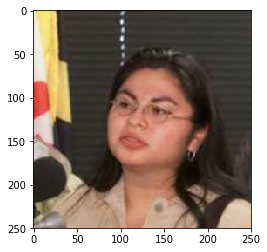

That is a dude but you look most like Silky terrier


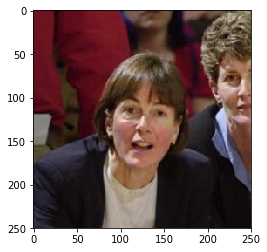

That is a dude but you look most like Australian shepherd


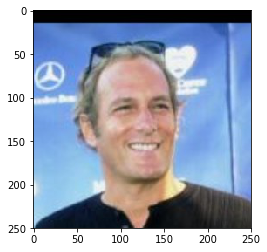

That is a dude but you look most like Silky terrier


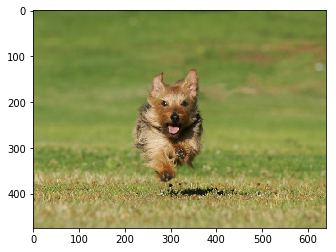

Definitely a dog and you are most likely a Australian terrier


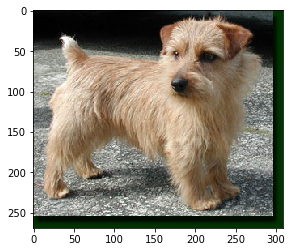

Definitely a dog and you are most likely a Norfolk terrier


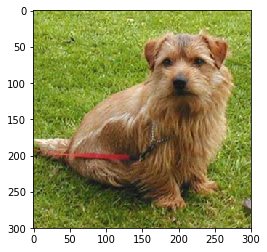

Definitely a dog and you are most likely a Norfolk terrier


In [94]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)






In [111]:
# load filenames for human and dog images
!rm -rf Self

!mkdir Self

!curl -O https://raw.githubusercontent.com/insighty/udacity/master/Self.zip

!unzip Self.zip #-d Self/
import numpy as np
from glob import glob



#self_files = np.array(glob("manly/*")) 
test_files = np.array(glob("Self/*"))
#run_app(test_files)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  893k  100  893k    0     0  4402k      0 --:--:-- --:--:-- --:--:-- 4402k
Archive:  Self.zip
  inflating: Self/alsatian.jpeg      
  inflating: Self/ashley-bennett.jpg  
  inflating: Self/gsd_dg.jpg         
  inflating: Self/lhassa.jpg         
  inflating: Self/tile_women.jpg     
  inflating: Self/woman3.jpg         
  inflating: Self/woman4.jpg         
  inflating: Self/YellowLabradorLooking_new.jpg  


In [112]:
!ls Self/

alsatian.jpeg	    gsd_dg.jpg	tile_women.jpg	woman4.jpg
ashley-bennett.jpg  lhassa.jpg	woman3.jpg	YellowLabradorLooking_new.jpg


In [84]:
#!rm *.zip.1
!ls

data				   lfw.zip	      sample_data
dogImages.zip			   manly	      Self
haarcascade_frontalface_alt.xml    manly.zip	      Self.zip
haarcascades			   models
imagenet1000_clsidx_to_labels.txt  model_scratch1.pt


In [0]:
test_full = test_files[:]

In [113]:
!rm -rf manly

!mkdir manly

!curl -O https://raw.githubusercontent.com/insighty/udacity/master/manly.zip

!unzip manly.zip #-d manly/
import numpy as np
from glob import glob


# load filenames for human and dog images
mantest_files = np.array(glob("manly/*")) 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  286k  100  286k    0     0  2492k      0 --:--:-- --:--:-- --:--:-- 2492k
Archive:  manly.zip
  inflating: manly/2.jpg             
  inflating: manly/4.jpg             
  inflating: manly/5.jpg             
  inflating: manly/6.jpg             
  inflating: manly/download.jpg      
  inflating: manly/Manyavar_Menu_Banners_Men_2.jpg  


In [109]:
mantest_files

array(['manly/manly'], dtype='<U11')

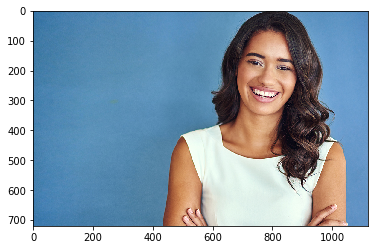

That is a dude but you look most like Havanese


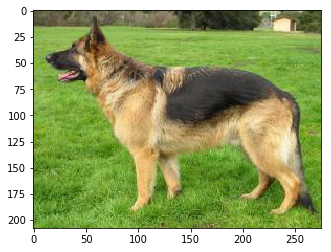

Definitely a dog and you are most likely a German shepherd dog


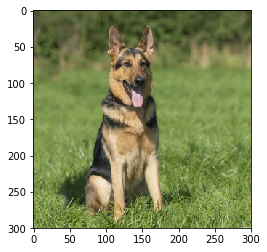

Definitely a dog and you are most likely a German shepherd dog


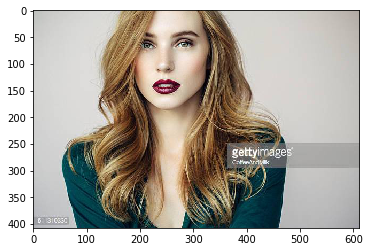

That is a dude but you look most like Silky terrier


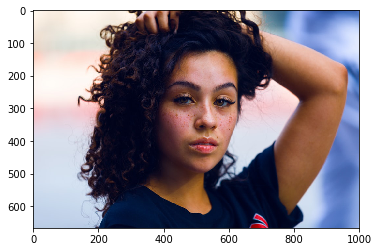

That is a dude but you look most like Yorkshire terrier


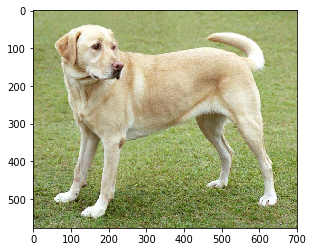

Definitely a dog and you are most likely a Anatolian shepherd dog


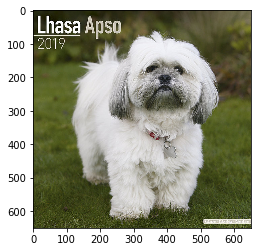

Definitely a dog and you are most likely a Lhasa apso


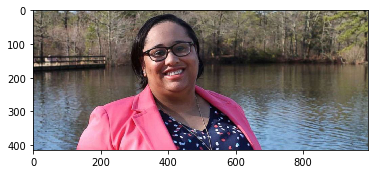

That is a dude but you look most like Black and tan coonhound


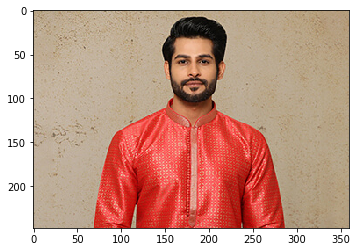

That is a dude but you look most like Silky terrier


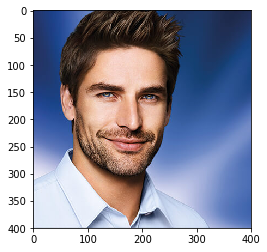

That is a dude but you look most like Silky terrier


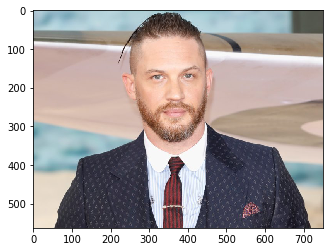

That is a dude but you look most like Silky terrier


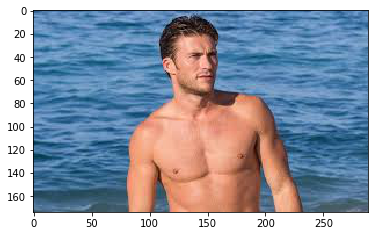

That is a dude but you look most like Pharaoh hound


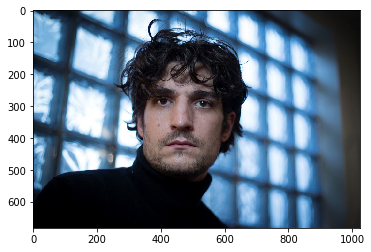

That is a dude but you look most like Yorkshire terrier


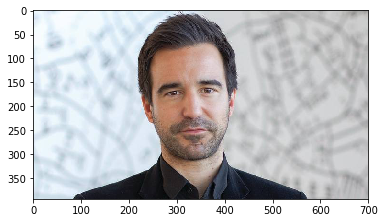

That is a dude but you look most like Silky terrier


In [114]:
for file in np.hstack((test_files, mantest_files)):
    run_app(file)

In [0]:
!rm *.zip.1

In [86]:
!ls

data				   lfw.zip	Self.zip
dogImages.zip			   manly	YellowLabradorLooking_new.jpg
haarcascade_frontalface_alt.xml    manly.zip	YellowLabradorLooking_new.jpg.1
haarcascades			   sample_data
imagenet1000_clsidx_to_labels.txt  Self
